In [52]:
from dicke_h import *
from qutip import *
from matplotlib import pyplot as plt
from pim_brute import collective_algebra, su2_algebra, excited_state_brute, make_cops

In [126]:
# define system size
ntls = 6
N = ntls
# define spin dynamics coefficients
gE = 0.5
gD = 0.3
gP = 0.9

gCE = 1
gCD = 1.0
gCP = 0.4

w0 = 1
wi = 2
# define time steps
t = np.linspace(0, 3, 100)

In [139]:
## Dicke basis
# define algebra (Dicke basis)
[jx, jy, jz, jp, jm] = j_algebra(N)
# build spin dynamics (Dicke basis)
h0 = w0 * jz
hint = wi * jx
h = h0 + hint
dicke = Dicke(hamiltonian = h, N = N, loss = gE, pumping = gP, dephasing = gD, emission = gCE, collective_pumping = gCP, collective_dephasing = gCD)
psolv = Pisolve(dicke)
#build spin liouvillian (Dicke basis)
liouv = psolv.liouvillian()
#set initial state for spins (Dicke basis)
rho0 = dicke.dicke(N/2, N/2)
#solve using qutip (Dicke basis)
result = mesolve(liouv, rho0, t, [], e_ops = [jz, jp*jm])
rhot = result.states
jz_t = result.expect[0]
jpjm_t = result.expect[1]

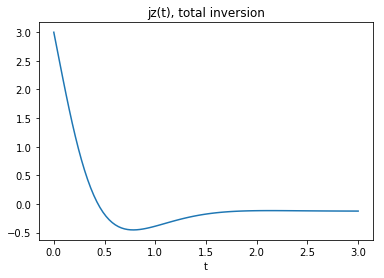

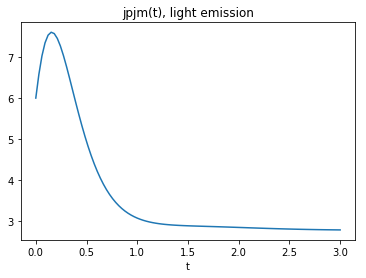

In [140]:
## Dicke basis plots
fig1 = plt.figure()
plt.plot(t, jz_t)
#plt.ylim([-1,1])
plt.title('jz(t), total inversion')
plt.xlabel('t')
plt.show()
plt.close()

fig2 = plt.figure()
plt.plot(t, jpjm_t)
#plt.ylim([-1,1])
plt.title('jpjm(t), light emission')
plt.xlabel('t')
plt.show()
plt.close()

In [141]:
## TLS spin basis
Nn = N
sx = sigmax()
sy = sigmay()
sz = sigmaz()
sm = sigmam()
sp = sigmap()
[Jx, Jy, Jz, Jm, Jp] = collective_algebra(Nn)
[sx_tls, sy_tls, sz_tls, sm_tls, sp_tls] = su2_algebra(Nn)
h0_tls = w0 * Jz
hint_tls = wi * Jx
h_tls = h0_tls + hint_tls
rho0_tls = excited_state_brute(N)
c_ops_tls = [np.sqrt(gCE)*Jm]
e_ops_tls = [Jz, Jp*Jm]
liouv_tls = liouvillian(h_tls, c_ops_tls)

In [142]:
c_ops_tls = make_cops(N = ntls, emission = gCE, loss = gE, dephasing = gD, pumping = gP, collective_pumping = gCP, collective_dephasing = gCD)
result_tls = mesolve(h_tls, rho0_tls, t, c_ops_tls, e_ops_tls)

In [143]:
rhot_tls = result_tls.states
jz_t_tls = result_tls.expect[0]
jpjm_t_tls = result_tls.expect[1]

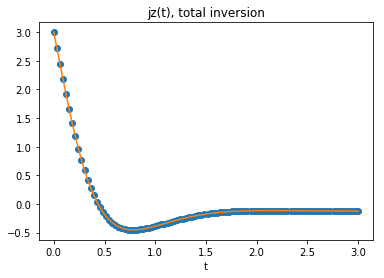

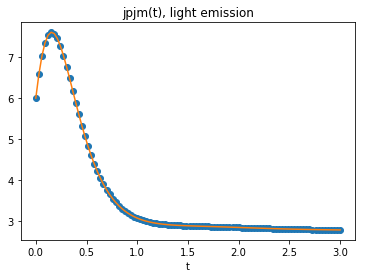

In [144]:
## TLS basis vs. Dicke basis comparison plots
fig5 = plt.figure()
plt.plot(t, jz_t, 'o', t, jz_t_tls )
#plt.ylim([-1,1])
plt.title('jz(t), total inversion')
plt.xlabel('t')
plt.show()
plt.close()

fig6 = plt.figure()
plt.plot(t, jpjm_t, 'o', t, jpjm_t_tls )
#plt.ylim([-1,1])
plt.title('jpjm(t), light emission')
plt.xlabel('t')
plt.show()
plt.close()